In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [3]:
train.shape

(17996, 17)

In [4]:
train.duplicated().sum()

0

In [5]:
train.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [6]:
test = pd.read_csv('test.csv')
test.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,David Bowie,Space Oddity - 2015 Remaster,73.0,0.310,0.403,NaN,-13.664,1,0.0326,0.07260,0.000093,0.1390,0.466,134.480,318027.000000,4
1,Crimson Sun,Essence of Creation,34.0,0.511,0.955,1.0,-5.059,1,0.1290,0.00040,0.000009,0.2630,0.291,151.937,220413.000000,4
2,P!nk,Raise Your Glass,78.0,0.700,0.709,7.0,-5.006,1,0.0839,0.00480,NaN,0.0289,0.625,122.019,202960.000000,4
3,Shawn Mendes,Wonder,80.0,0.333,0.637,1.0,-4.904,0,0.0581,0.13100,0.000018,0.1490,0.132,139.898,172693.000000,4
4,Backstreet Boys,Helpless When She Smiles - Radio Version,48.0,0.393,0.849,11.0,-4.114,1,0.0459,0.00421,NaN,0.1620,0.222,74.028,4.093117,4


In [7]:
test.shape

(7713, 16)

In [8]:
test.isnull().sum()

Artist Name              0
Track Name               0
Popularity             227
danceability             0
energy                   0
key                    808
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      1909
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
dtype: int64

In [9]:
x = ['Popularity', 'key', 'instrumentalness']
for i in x:
    train[i] = train[i].fillna(train[i].mean())
    test[i] = test[i].fillna(test[i].mean())

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17996 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 17996 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    17996 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         7713 non-null   object 
 1   Track Name          7713 non-null   object 
 2   Popularity          7713 non-null   float64
 3   danceability        7713 non-null   float64
 4   energy              7713 non-null   float64
 5   key                 7713 non-null   float64
 6   loudness            7713 non-null   float64
 7   mode                7713 non-null   int64  
 8   speechiness         7713 non-null   float64
 9   acousticness        7713 non-null   float64
 10  instrumentalness    7713 non-null   float64
 11  liveness            7713 non-null   float64
 12  valence             7713 non-null   float64
 13  tempo               7713 non-null   float64
 14  duration_in min/ms  7713 non-null   float64
 15  time_signature      7713 non-null   int64  
dtypes: flo

In [12]:
train['Class'].value_counts()

10    4949
6     2587
9     2524
8     1854
5     1447
1     1373
2     1272
0      625
7      576
3      402
4      387
Name: Class, dtype: int64

In [13]:
train['Class'] = train['Class'].replace({0: 'Acoustic/Folk_0', 1 : 'Alt_Music_1', 2 : 'Blues_2', 3 : 'Bollywood_3', 
                                        4 : 'Country_4', 5 : 'HipHop_5', 6 : 'Indie Alt_6', 7 : 'Instrumental_7',
                                        8 : 'Metal_8', 9 : 'Pop_9', 10 : 'Rock_10'})
train['Class'].value_counts()

Rock_10            4949
Indie Alt_6        2587
Pop_9              2524
Metal_8            1854
HipHop_5           1447
Alt_Music_1        1373
Blues_2            1272
Acoustic/Folk_0     625
Instrumental_7      576
Bollywood_3         402
Country_4           387
Name: Class, dtype: int64

In [14]:
train['duration_in min/ms'] = train['duration_in min/ms']/60000
test['duration_in min/ms'] = test['duration_in min/ms']/60000

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
x = ['Artist Name', 'Track Name']
for i in x:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

In [17]:
train['Class'] = le.fit_transform(train['Class'])

In [18]:
train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1182,11406,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,3.909933,4,5
1,1092,4988,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,4.195550,4,10
2,7899,8144,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,1.827783,4,6
3,1987,6753,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,2.899467,4,5
4,6283,8167,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,3.832667,4,10


In [19]:
test.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,1016,5092,73.0,0.310,0.403,5.924692,-13.664,1,0.0326,0.07260,0.000093,0.1390,0.466,134.480,5.300450,4
1,912,1649,34.0,0.511,0.955,1.000000,-5.059,1,0.1290,0.00040,0.000009,0.2630,0.291,151.937,3.673550,4
2,3165,4411,78.0,0.700,0.709,7.000000,-5.006,1,0.0839,0.00480,0.170052,0.0289,0.625,122.019,3.382667,4
3,3749,6348,80.0,0.333,0.637,1.000000,-4.904,0,0.0581,0.13100,0.000018,0.1490,0.132,139.898,2.878217,4
4,363,2356,48.0,0.393,0.849,11.000000,-4.114,1,0.0459,0.00421,0.170052,0.1620,0.222,74.028,0.000068,4


-------

In [20]:
newtrain = train
newtest = test

In [21]:
x = newtrain.drop('Class', axis = 1)
y = newtrain['Class']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [23]:
from sklearn.metrics import accuracy_score, classification_report

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gab = GradientBoostingClassifier()
y_pred = gab.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, y_pred))

0.5766666666666667


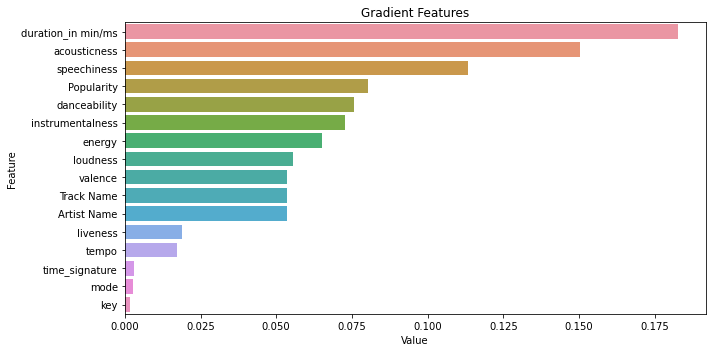

In [25]:
feature_imp = pd.DataFrame(sorted(zip(gab.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Features')
plt.tight_layout()
plt.show()

In [26]:
x = newtrain.drop(['Class', 'liveness', 'tempo', 'time_signature', 'mode', 'key'], axis = 1)
y = newtrain['Class']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gab = GradientBoostingClassifier()
y_pred = gab.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, y_pred))

0.5736111111111111


In [28]:
x_train = newtrain.drop(['Class', 'liveness', 'tempo', 'time_signature', 'mode', 'key'], axis = 1)
y_train = newtrain['Class']
x_test = newtest.drop(['liveness', 'tempo', 'time_signature', 'mode', 'key'], axis = 1)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gab = GradientBoostingClassifier()
y_pred = gab.fit(x_train, y_train).predict_proba(x_test)

In [30]:
submission = pd.read_csv('submission.csv')
submission.shape

(7713, 11)

In [31]:
finalprediction = pd.DataFrame(y_pred)
finalprediction.columns = submission.columns
finalprediction.to_csv("Final Solution.csv",index=False)